# Climate classifications

Climate classes are a way of grouping different areas of the world based on their climate, or the average weather conditions in a specific region over a long period of time. Climate classes are used in many fields, including agriculture, forestry, and urban planning, to help understand the unique weather patterns and natural resources of an area and how they may impact human activities.

There are many different ways to classify climate, but one of the most widely used systems is the Köppen-Geiger climate classification system, which was developed in the late 1800s by German climatologist Wladimir Köppen. The Köppen-Geiger system categorizes climates into five main groups: tropical, dry, temperate, continental, and polar. Within each of these groups, there are subcategories based on specific temperature and precipitation patterns.

Climate classes are useful because they provide a standardized way of comparing and understanding the weather patterns of different regions. They allow us to identify areas with similar climates and make informed decisions about how to best use and manage natural resources in those regions. For example, a farmer in a tropical climate may need to consider different crops and irrigation strategies than a farmer in a dry climate. Similarly, an urban planner designing a city in a temperate climate may need to consider different building materials and energy efficiency measures than a planner in a polar climate.

Overall, climate classes are an important tool for understanding and adapting to the unique conditions of different regions around the world.

## Climate classification based on GPP
Gross primary productivity (GPP) refers to the rate at which plants produce organic matter through photosynthesis. It is an important measure of the health and productivity of an ecosystem, and is often used to understand how different climate conditions impact the growth and productivity of plants.

One way in which GPP can be used to generate climate classes is by looking at the relationship between GPP and temperature. In general, plants tend to have higher GPP in warmer temperatures, as they are able to photosynthesize more efficiently at higher temperatures. However, there is a point at which temperatures become too high and plants begin to experience stress, leading to decreased GPP. By analyzing the relationship between GPP and temperature in different regions, it is possible to identify areas with similar climates and group them into distinct climate classes.

Another way in which GPP can be used to generate climate classes is by looking at the relationship between GPP and precipitation. In general, plants tend to have higher GPP in areas with sufficient water availability, as water is necessary for photosynthesis and plant growth. By analyzing the relationship between GPP and precipitation in different regions, it is possible to identify areas with similar climates and group them into distinct climate classes.

Overall, GPP is a useful tool for understanding the impacts of different climate conditions on plant growth and productivity, and can be used to generate climate classes based on temperature and precipitation patterns in different regions.

**TODO: Generate a map with climate classes based on GPP. The classes should be assigned according to the water and energy availability (whether temperature and precipitation are at the time of maximal GPP higher or lower than the annual mean in this location). Temperature and precipitation are interpreted as the driving climate factors since they set the water and energy limitations.**


**Therefore, determine a mean seasonal cycle of each location. Pick the day of the year in which GPP is at its maximum. Prepare a classification of 4 classes according to energy and water availability (are temperature and precipitation higher or lower than the average at this location).**

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import fsspec
import warnings

warnings.filterwarnings("ignore")

# Open the dataset
ds = xr.open_zarr(fsspec.get_mapper('/work/users/gy963viny/public/EarthSystemDataCube/v2.1.1/esdc-8d-0.25deg-184x90x90-2.1.1.zarr/'), \
                  consolidated=True)

In [2]:
# extracting GPP, Temperature and Precipitation
gpp_mean = ds.gross_primary_productivity.groupby('time.dayofyear').mean()
temp_mean = ds.air_temperature_2m.groupby('time.dayofyear').mean()
precip_mean = ds.precipitation.groupby('time.dayofyear').mean()

In [3]:
# Max of GPP
max_gpp = gpp_mean.max('dayofyear')

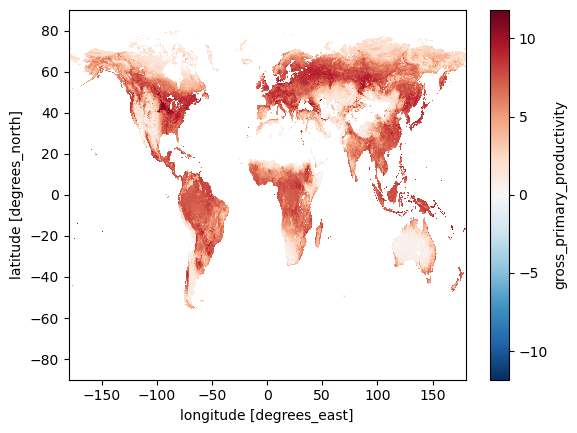

In [5]:
max_gpp.plot()

In [6]:
# Actual Time from max of GPP
mask = gpp_mean.idxmax('dayofyear')

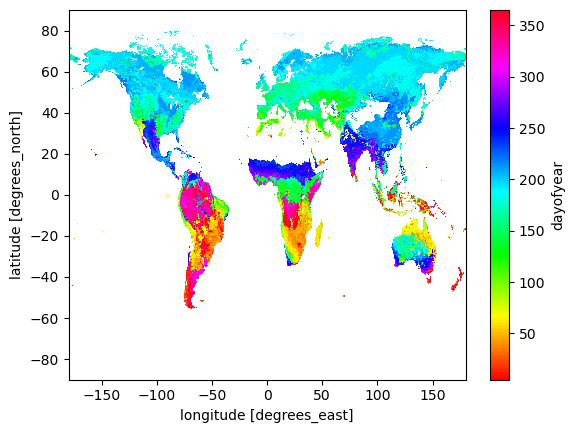

In [7]:
mask.plot(cmap='hsv')

In [8]:
# Extracting Temperature and Precipitation at the actual time of GPP max
temp_at_doy = temp_mean.where(temp_mean['dayofyear'] == mask)
temp_at_doy = temp_at_doy.max('dayofyear', skipna=True)
precip_at_doy = precip_mean.where(precip_mean['dayofyear'] == mask)
precip_at_doy = precip_at_doy.max('dayofyear', skipna=True)

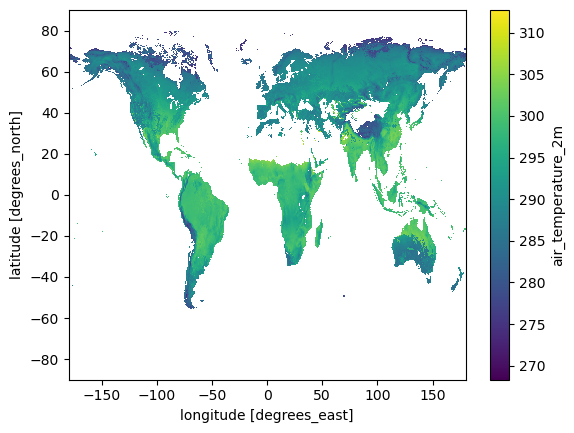

In [9]:
temp_at_doy.plot()

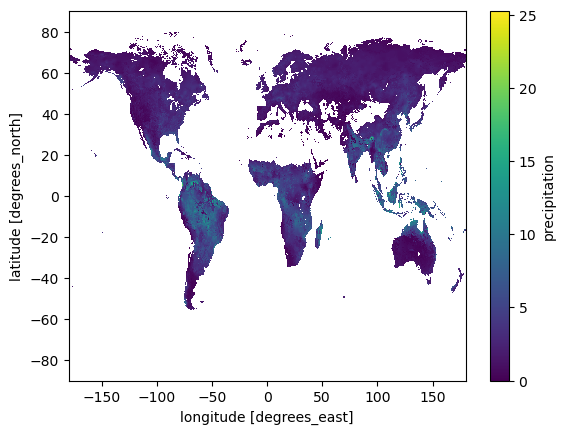

In [10]:
precip_at_doy.plot()

In [11]:
# Temperature and Precipitation annual mean
temp_mean_annual = temp_mean.mean('dayofyear', skipna=True)
precip_mean_annual = precip_mean.mean('dayofyear', skipna=True)

In [12]:
# filling classification with different arrays which have 4 values 
classification = xr.where( (temp_at_doy > temp_mean_annual) & (precip_at_doy > precip_mean_annual), 1, # "Warm and Wet"
                 xr.where((temp_at_doy < temp_mean_annual) & (precip_at_doy < precip_mean_annual), 2, # "Cool and Dry"
                 xr.where((temp_at_doy > temp_mean_annual) & (precip_at_doy < precip_mean_annual), 3, # "Warm and Dry"
                 xr.where((temp_at_doy < temp_mean_annual) & (precip_at_doy > precip_mean_annual), 4, # "Cool and Wet"
                 xr.full_like(temp_mean_annual, np.nan))))) # NaN where at the pixels with no values

Text(0.5, 1.0, '4 Climate Classes GPP')

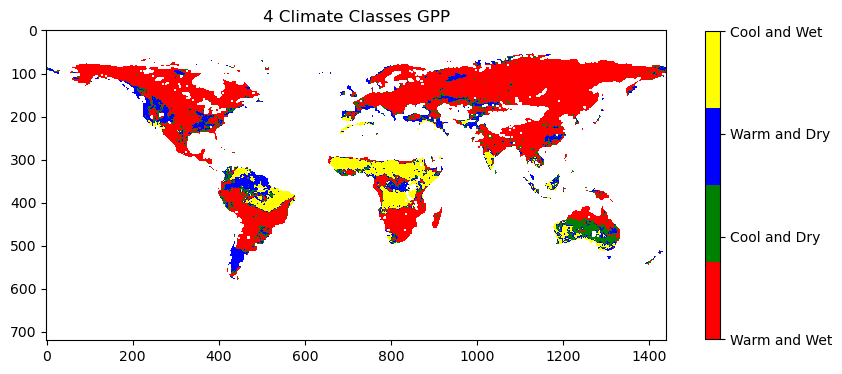

In [13]:
# colormap
colors = ['red', 'green', 'blue', 'yellow']
cmap = mcolors.ListedColormap(colors)

# actual plotting
plt.figure(figsize=(10,8))
plt.imshow(classification, cmap=cmap, vmin=1, vmax=4)
cbar = plt.colorbar(ticks=np.arange(1,5), shrink=0.5)
cbar.ax.set_yticklabels(["Warm and Wet", "Cool and Dry", "Warm and Dry", "Cool and Wet"])
plt.title("4 Climate Classes GPP")